In [28]:
import evo_prot_grad
from transformers import AutoModel
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; 
sns.set_style("whitegrid")
# set font size seaborn
sns.set_context("notebook", font_scale=1.25)

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## HuggingFace ESM2 8M model + Supervised fluorescence regression model

In [40]:
# HuggingFace ESM2 8M model
esm2_expert = evo_prot_grad.get_expert('esm', temperature = 1.0, device = 'cuda')

# Supervised fluorescence regression model
gfp_expert = evo_prot_grad.get_expert(
                        'onehot_downstream_regression',
                        temperature = 1.0,
                        model = AutoModel.from_pretrained('NREL/avGFP-fluorescence-onehot-cnn',trust_remote_code=True),
                        device = 'cuda')

variants, scores = evo_prot_grad.DirectedEvolution(
                        wt_fasta = 'test/gfp.fasta',
                        output = 'all',
                        experts = [esm2_expert, gfp_expert],
                        parallel_chains = 16,
                        n_steps = 1000,              
                        max_mutations = 15,
                        verbose = False
)()


Explicitly passing a `revision` is encouraged when loading a configuration with custom code to ensure no malicious code has been contributed in a newer revision.
Explicitly passing a `revision` is encouraged when loading a model with custom code to ensure no malicious code has been contributed in a newer revision.


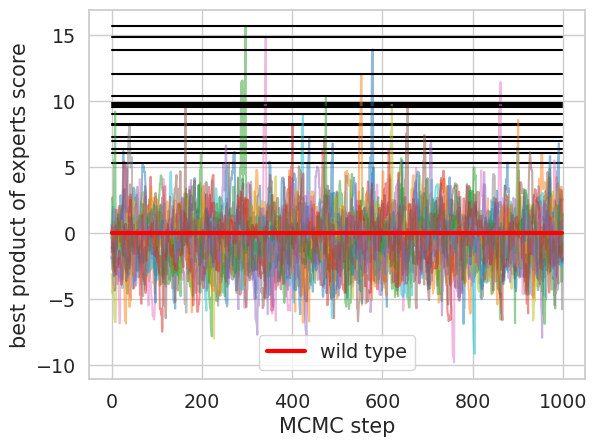

In [41]:
plt.figure()
for i in range(scores.shape[1]):
    plt.plot(scores[:,i], alpha=0.5)
    best_step = np.argmax(scores[:,i])
    best_score = scores[best_step,i]
    plt.plot(np.arange(0,scores.shape[0]), best_score * np.ones((scores.shape[0],)), c='black')
plt.plot(np.arange(0,scores.shape[0]), np.zeros((scores.shape[0],)), c='red', linewidth=3, label='wild type')
plt.xlabel('MCMC step')
plt.ylabel('best product of experts score')
plt.legend()
plt.show()

In [42]:
for i in range(scores.shape[1]):
    best_step = np.argmax(scores[:,i])
    print(f'score: {scores[best_step,i]}, variant: {variants[best_step][i]}')

score: 7.268056869506836, variant: S K G E E L F T G V V P I L V E L D K D V N G H K F S V S G E G E G D A T Y G K L T L K F I C T T G K L P V P W P T L V T T L S Y G V Q C F S R Y P D H M K Q H D F F K S A M P E G Y V Q E R T I F F K D D G N Y K T R A E V K F E G D T L V N R I E L K G I D F K E D G N I L G H K L E Y N Y N S H N V Y I M A D K Q K N G I K V N F K I R H N I E D G S V Q L A D H Y Q Q N T P I G D G P V L L P D N H Y L S T Q S A L S K D P N E K R D H M V L L E F V T A A G I T H G M D E L Y K
score: 6.0703864097595215, variant: S K G E E L F T G V V P I L V E L D G D V N G H K F S V S G E F E G D A T K G K L T L K F I C T T G K L P V P W P T L V T T L S Y G V Q C F S R L P D H M P Q H D F F K S A M P E G Y V Q E R T I F F K D D G N Y K T R A E V K F E G D T L V N R I E L K G I D F K E D G N I L G N K L E Y N L N S H N V Y I M A D K Q K N G I K V N F K I R H N I E D G S V Q L A D H Y Q Q N F P I G D G P V L L P K N H Y L S L Q F A L S K D P N E K R D H M V L L E F V T A A G I